# 911 Calls Capstone Project

In [1]:
# Importing visual libraries for visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
calls=pd.read_csv('911.csv')

In [5]:
# Lets take a look to pur dataset how does it looks

calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [6]:
# fetching some information from dataset

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Top 8 zip code for 911 calls

In [12]:

calls['zip'].value_counts().head(8) # I have used head() because head() give values in decreasing order

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
Name: zip, dtype: int64

## Top 5 Townships for 911 calls

In [13]:
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Take a look at the 'title' column, how many unique title codes are there

In [14]:
calls['title'].nunique()

110

### Creating new features

In [16]:
calls['Reason']=calls['title'].apply(lambda x : x.split(':')[0])

In [17]:
calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


### Most common Reason for a 911 call based off of this new column 

In [20]:
calls['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Now i am using seaborn to make countplot of 911 calls by Reason

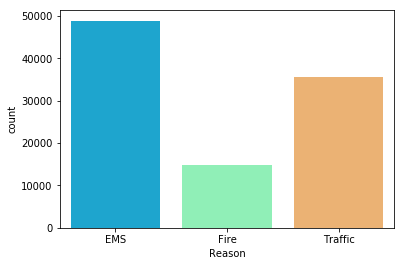

In [23]:
sns.countplot(x='Reason',data=calls,palette='rainbow')

### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column

In [28]:
type(calls['timeStamp'].iloc[0])

str

### convert the column from strings to DateTime objects 

In [29]:
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])

In [31]:
type(calls['timeStamp'].iloc[0]) #Lets check type of timestamp again

pandas._libs.tslib.Timestamp

### Now will make separate column for each 'Hour', 'Month' ,'Day of Week'

In [38]:
time=calls['timeStamp'].iloc[0]

In [41]:
time.hour

17

In [42]:
calls['Hour']=calls['timeStamp'].apply(lambda x : x.hour)

In [43]:
calls['Month']=calls['timeStamp'].apply(lambda x : x.month)

In [44]:
calls['Day of Week']=calls['timeStamp'].apply(lambda x : x.dayofweek)

In [45]:
calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3


### Notice how the Day of Week is an integer 0-6. Use the .map() with name dictionary to map the actual string names to the day of the week:

In [46]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} #Creating dictionary of actual day of week

In [47]:
calls['Day of Week']=calls['Day of Week'].map(dmap)

In [48]:
calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


### Now i am using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

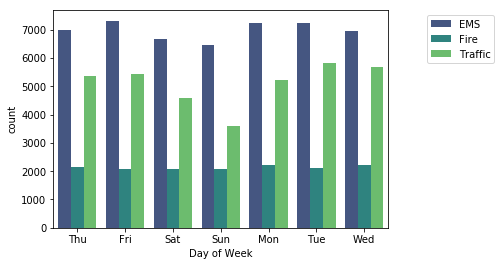

In [52]:
sns.countplot('Day of Week',hue='Reason',data=calls,palette='viridis')
plt.legend(bbox_to_anchor=(1.1, 1))

### Now comparing with Month

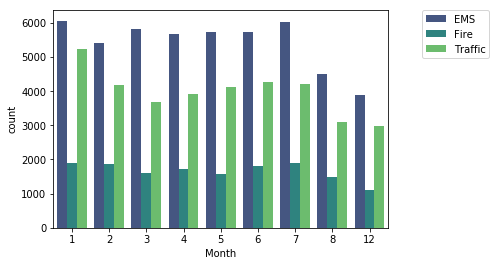

In [56]:
sns.countplot('Month',hue='Reason',data=calls,palette='viridis')
plt.legend(bbox_to_anchor=(1.1, 1),loc=2,borderaxespad=0)

### Now, let's check out the relationship between the number of calls and the month. 

In [58]:
byMonth = calls.groupby('Month').count()

In [60]:
byMonth.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


### Lets plot lmplot on no. of call vs month and see if there is any relationship

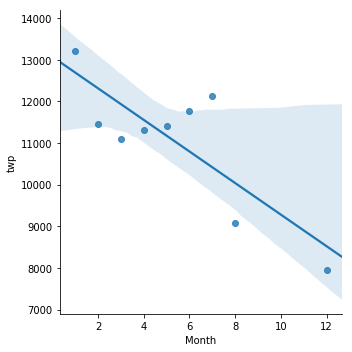

In [66]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

So, it does seem like very few calls has made in between 8-12 months.

### Let's extract date from timeStamp and create one column to gain some more info from data

In [68]:
calls['Data']=calls['timeStamp'].apply(lambda x : x.date())

In [69]:
calls.drop('Data',inplace=True,axis=1)

In [70]:
calls['Date']=calls['timeStamp'].apply(lambda x : x.date())

#### Now let's check relationship between date and Number of calls

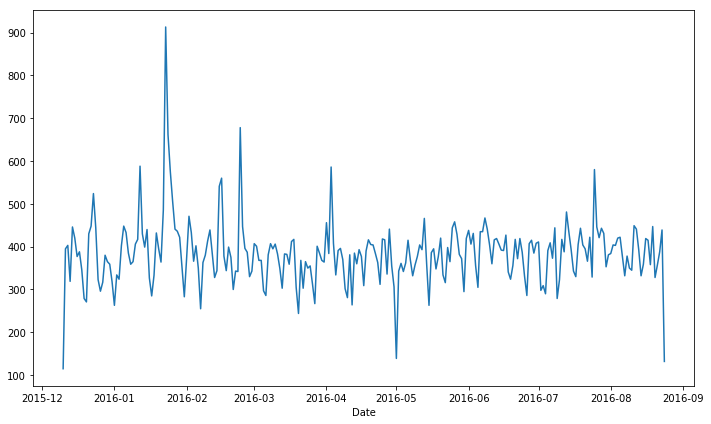

In [74]:
plt.figure(figsize=(10,6))
calls.groupby('Date').count()['twp'].plot()
plt.tight_layout()

#### Now we will plot the same plot but we'll plot for each Reason separetely

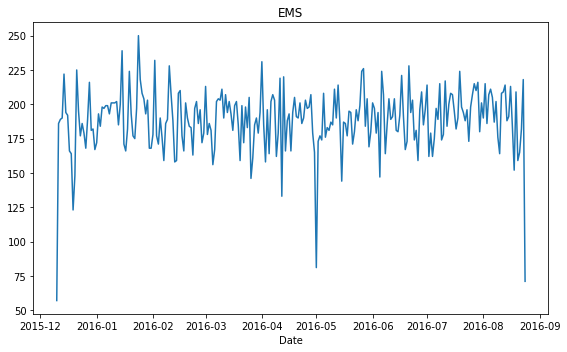

In [77]:
plt.figure(figsize=(8,5))
calls[calls.Reason=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

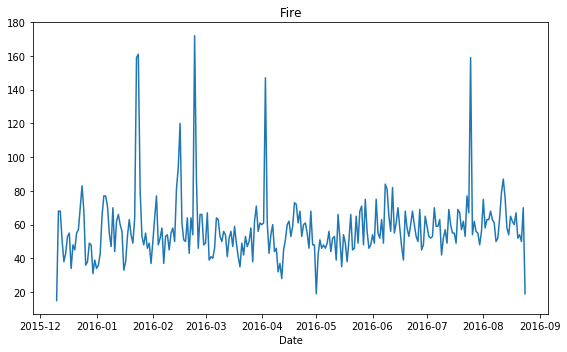

In [78]:
plt.figure(figsize=(8,5))
calls[calls.Reason=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

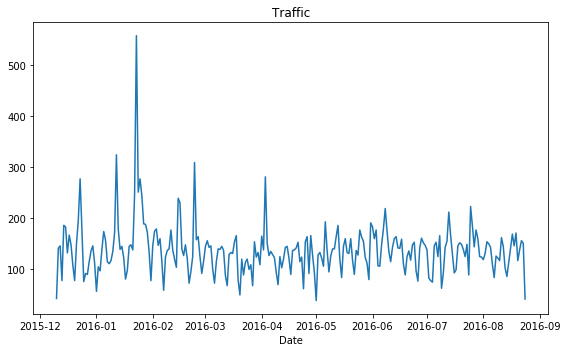

In [79]:
plt.figure(figsize=(8,5))
calls[calls.Reason=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

#### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. for this we will use unstack() of pandas.

In [84]:
dayhour = calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [85]:
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#### Now create a HeatMap using this new DataFrame.

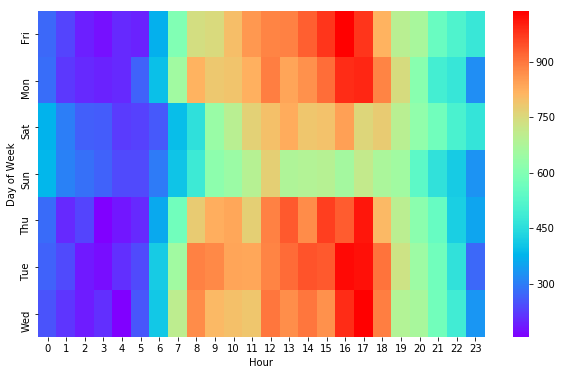

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(dayhour,cmap='rainbow')

Seems like in weekdays in evening hour's most of the calls have made

#### Now Plot cluster map to gain more depth information

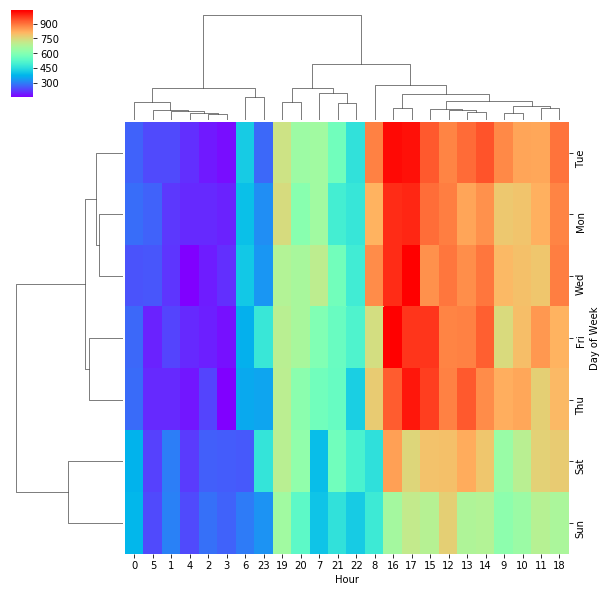

In [89]:
sns.clustermap(dayhour,cmap='rainbow')

#### Now repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [91]:
dayMonth = calls.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


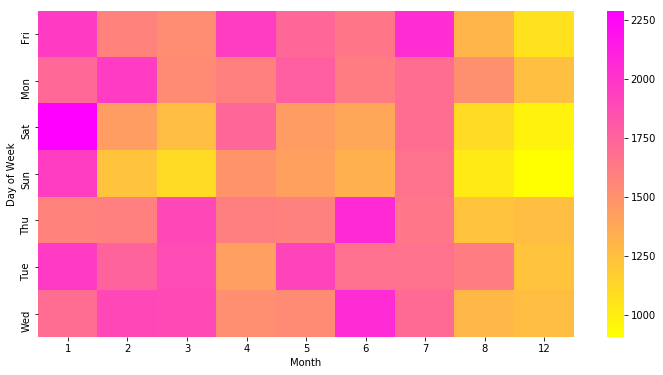

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='spring_r')

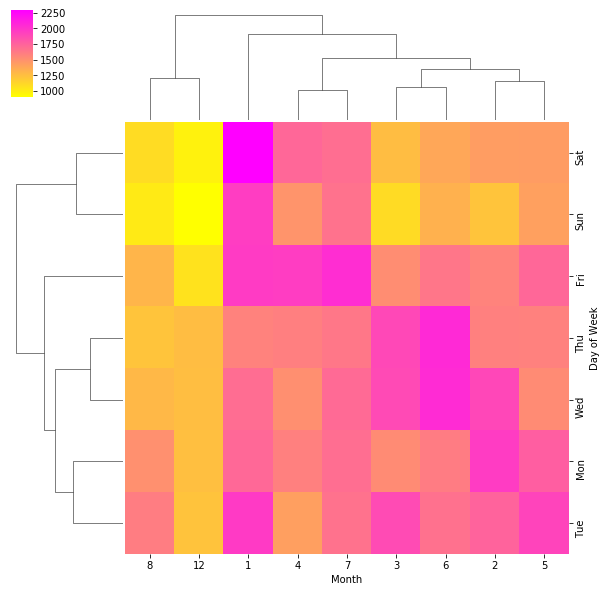

In [105]:
sns.clustermap(dayMonth,cmap='spring_r')

## Thank You !